In [25]:
import pandas as pd
import math
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
col_names = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df = pd.read_csv("data/abalone.data", header=None, names=col_names)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


In [28]:
df.shape

(4177, 10)

In [29]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [30]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.518552,0.215459
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.557592,0.252038
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.521842,0.251793
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.556081,0.242194
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.436063,0.181831
Sex_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,1.000000,-0.522541
Sex_M,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,0.181831,-0.522541,1.000000


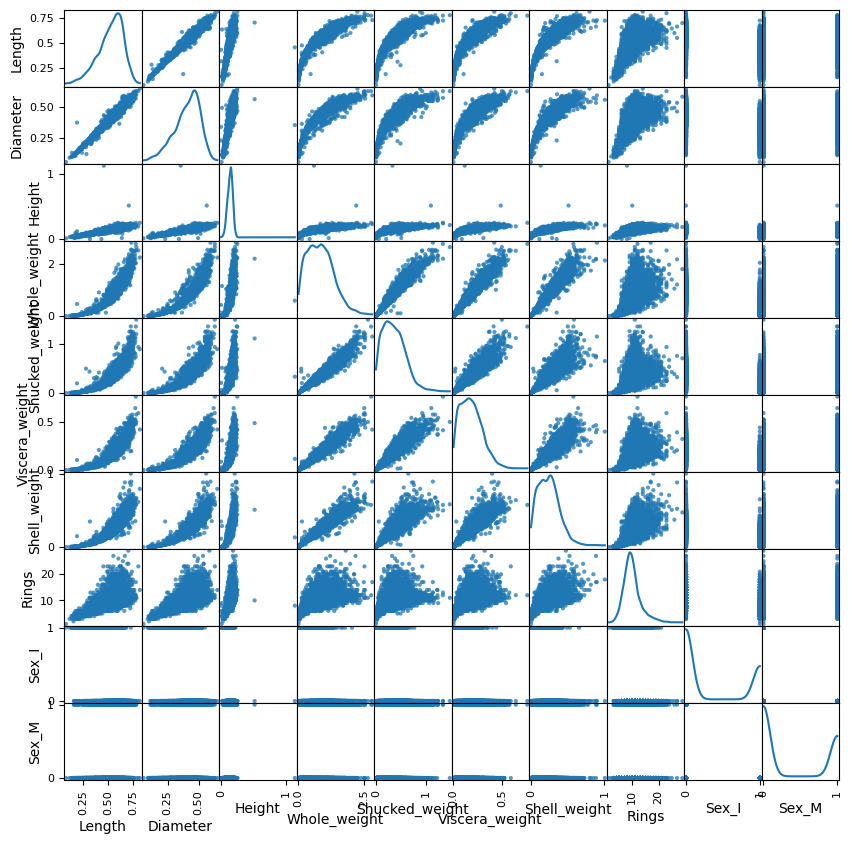

In [39]:
df[['Sex_I', 'Sex_M']] = df[['Sex_I', 'Sex_M']].astype(int)
scatter_matrix(df, figsize=(10, 10), alpha=0.75, diagonal='kde')
plt.savefig('plots/abalone.png')
plt.show()

In [32]:
X = df.drop(columns='Rings')
y = df.Rings

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)

(3132, 9)


In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('R^2:', model.score(X_train, y_train))

intercept: 3.91085614463705
slope: [ -1.45240996  12.65718031   9.16105749   8.48824635 -19.41954003
  -9.07097611   8.83729616  -0.8095619    0.09705978]
R^2: 0.5376900347266163


In [35]:
yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

RMSE 2.1831074597330833


In [36]:
X['SexMsquared'] = np.square(df.Sex_M)
X['SexIsquared'] = np.square(df.Sex_I)
X['Lenghtsquared'] = np.square(df.Length)
X['Diametersquared'] = np.square(df.Diameter)
X['Heightsquared'] = np.square(df.Height)
X['Whole_weightsqaured'] = np.square(df.Whole_weight)
X['Viscera_weightsqaured'] = np.square(df.Viscera_weight)
X['Shell_weightsqaured'] = np.square(df.Shell_weight)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M,SexMsquared,SexIsquared,Lenghtsquared,Diametersquared,Heightsquared,Whole_weightsqaured,Viscera_weightsqaured,Shell_weightsqaured
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,1,1,0,0.207025,0.133225,0.009025,0.264196,0.010201,0.022500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,1,1,0,0.122500,0.070225,0.008100,0.050850,0.002352,0.004900
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,0,0,0,0.280900,0.176400,0.018225,0.458329,0.020022,0.044100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,1,1,0,0.193600,0.133225,0.015625,0.266256,0.012996,0.024025
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1,0,0,1,0.108900,0.065025,0.006400,0.042025,0.001560,0.003025


In [37]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('R^2:', model.score(X_train, y_train))

(3132, 17)
intercept: 0.406606696350611
slope: [ 8.35317193e+00  1.85141031e+01  1.72910456e+01  7.33952347e+00
 -1.83964784e+01 -9.87063886e+00  2.38986124e+01 -3.59595539e+12
 -1.69259073e+14  1.69259073e+14  3.59595539e+12 -1.62747433e+01
 -1.63039854e+01 -1.35657969e+01  8.71216166e-01  2.59623678e+00
 -1.67563537e+01]
R^2: 0.5576659796236869


In [38]:
yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

RMSE 2.1335284450297496
